# Fundamentals of Visualizations

- Flex-ODS
- 08/05/21
- Hosted by James Irving

## Learning Objectives

- Discuss an overview of the types of visualizations available.
- Discuss which types of visuals are best for showing what type of information/comparisons.


- Discuss the Anatomy of a Matplotlib Figure

- Discuss the many ways to create/start a figure
    - Matplotlib plt functions
    - Matploltib OOP interface
    - Pandas
    - Seaborn
- Overhauling the Aesthetics with Matplotlib styles and seaborn contexts.

- Activity: Answering Questions via EDA

## Prerequisites

- To get the most out of this study group, you should have already learned how to work with Panda's DataFrames (Topic 04)

# Types of Data Visualizations

## Data Visualization Overview

- We use visualizations to tell a story about our data. 
    - Knowing which visualization is best to tell the story you are trying to tell is an important skill. 


- Let's Explore Different Types of Visualizations and when they are most appropriate to use. 

    - [The Data Viz Project](https://datavizproject.com/)

    - [Blog Post: How to Choose a Chart Type](https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6)




### Example Galleries [Python Packages]
Let's explore the Python-specific options available to us. 


- https://www.python-graph-gallery.com/
- [Matplotlib Example Gallery](https://matplotlib.org/gallery/index.html#examples-index) 
- [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
- [Pandas Visualization docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
- [Plotly Express](https://plotly.com/python/plotly-express/)

# Using Visualizations to Answer Questions

- We will be working with part of the AMES housing data set for today's study group.
- We will be exploring the data set and using visualizations to answer several questions about homes in Ames, Iowa.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

print('- Package Versions:')
print(f'\tMatplotlib = {mpl.__version__}')
print(f'\tPandas = {pd.__version__}')
print(f'\tSeaborn = {sns.__version__}')

- Package Versions:
	Matplotlib = 3.3.4
	Pandas = 1.1.5
	Seaborn = 0.11.1


In [2]:
## From https://github.com/learn-co-curriculum/dsc-regression-boston-lab
cols_to_use = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 
          'OverallQual', 'LotArea', 'SalePrice','BldgType']

df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-regression-boston-lab/master/ames.csv',
                usecols=cols_to_use
                )
display(df.head())
df.info()

,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,MoSold,YrSold,SalePrice
0,8450,1Fam,7,5,2003,2003,1710,2,8,0,2,2008,208500
1,9600,1Fam,6,8,1976,1976,1262,2,6,1,5,2007,181500
2,11250,1Fam,7,5,2001,2002,1786,2,6,1,9,2008,223500
3,9550,1Fam,7,5,1915,1970,1717,1,7,1,2,2006,140000
4,14260,1Fam,8,5,2000,2000,2198,2,9,1,12,2008,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1460 non-null   int64 
 1   BldgType      1460 non-null   object
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YearBuilt     1460 non-null   int64 
 5   YearRemodAdd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   FullBath      1460 non-null   int64 
 8   TotRmsAbvGrd  1460 non-null   int64 
 9   Fireplaces    1460 non-null   int64 
 10  MoSold        1460 non-null   int64 
 11  YrSold        1460 non-null   int64 
 12  SalePrice     1460 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 148.4+ KB


## The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What is the median home price?
    - What is the average home price?
    

2. What is the relationship between square footage of the living area (`GrLivArea`)  and sale price (`SalePrice`)?
    
2. What is the average sale price for each of the different types of homes (BldgType)?

# The Many Ways of Making a Figure in Python

- There are MANY ways to make data visualizations with Python. 
- Today, we will focus on non-interactive visualizations.( Sorry, Plotly Express :*-( )

- The ~4 Different Ways to Plot with Python:

    1. Matplotlib plt functions:
        - `plt.plot`/`.bar`,`.scatter`, etc.      
    2. Matploltib OOP interface:
       ```python 
       fig, ax =plt.subplots()
       ax.plot#/ax.scatter, ax.bar, etc
        ```
        
    3. Pandas:
        ```python
         ax = df.plot()
         ax.set(#...
        ```
        
    4. Seaborn:
        ```python
         sns.histplot
         sns.regplot
         sns.scatter
        ```  

- **All 4 of these approaches to making figures with Python ultimately use matplotlib behind the scenes.**

> For this section of the notebook, we will focus on answering one question in each of the 4+ different ways. 
> #### Q1: What is the distribution of house prices in Ames, Iowa?

## Method 01: Using Matplotlib Plt Functions

- Select the correct plt function and plot the data.
- Make sure that:
    - We have an xlabel,ylabel, and title.
    - the figure is large enough
- Add a vertical line for the mean, including a label with the mean. 
    - Make sure its: 
        - Different color than the bars
        - a dotted line
- Add a legend 

#### Plot 1: Sale Price Distribution

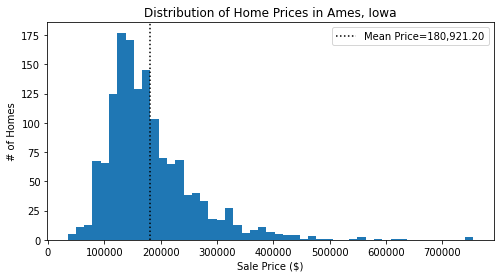

In [3]:
#Plot 1: Sale Price Distribution
plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'],bins='auto');
plt.xlabel("Sale Price ($)")
plt.ylabel("# of Homes")
plt.title('Distribution of Home Prices in Ames, Iowa');
plt.axvline(df['SalePrice'].mean(),color='k', ls=':',
            label=f"Mean Price={df['SalePrice'].mean():,.2f}", 
#             label=f"Mean Price={round(df['SalePrice'].mean(),2)}",             
          )
plt.legend()

## Method 02: Using Matplotlib OOP Interface

#### A Tale of Two Syntaxes
-  *Matplotlib is powerful but can be a bit confusing at times because of its 2 sets of commands:*
    - the matplotlib.pyplot functions (`plt.bar()`,`plt.title()`)
    - the object_oriented methods (`ax.bar()`,`ax.set_title()`)
    
- The 2 syntaxes can be confusing at first and cause problems & odd results when mixed together.
    - Learn about some of the problems when mixing types.
    - Example: see how plt.title()/plt.xlabel(),etc. can behave strangely in subplots.
    
    - **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

<!-- - [My Blog Post on Making Customized Figures in seaborn](https://jirvingphd.github.io/harnessing_seaborn_subplots_for_eda)
    - This covers some concepts we didn't have time to cover, like ticklabel formatters. -->

>- ***So... what are "object-oriented-methods" anyway?***

### Anatomy of a Matplotlib Figure



<center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_anatomy.png" width=400></center>

- Matplotlib Figures are composed of 3 different types of objects:
    - `Figure` is the largest bucket and contains everything else. It is like a picture frame without any actual images in it.
  - `Axes` are the actual plot / image inside of the Figure / frame. 
        - this is the same `ax` as in `fig, ax = plt.subplots()` and that is returned when you create a Pandas or Seaborn figure.
        - There is an 'Axes` for each subplot in the Figure

        

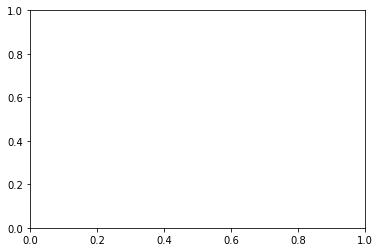

In [4]:
## Make an empty figure and ax with plt.subplots
fig, ax = plt.subplots()

### OOP Crash Course

- **Object-Oriented Programming (OOP):**
    - OOP is all about working with Classes, which are the blueprints for a type of variable. 
    - Objects/classes can have functions that are attached to the object. 
        - When a function is attached to a class its called a **method**
    - Object can also store variables inside themselves. 
        - When a variable is attached to an object it is called an **attribute**
        
        
- OOP Examples You already Know:
    - `pd.DataFrame` is a class
    - `df = pd.DataFrame(...)` creates a dataframe object.
    - DataFrames have **atrributes**:
        - `df.columns`
        - `df.index`
        - `df.dtypes`
    - DataFrames have **methods**
        - `df.head()`
        - `df.sort_values()`
        - `df.info()`
        - `df.dropna()`
        - `df.plot()`
        
        
- You will learn about classes in Phase 3.
        

In [5]:
## Run help on fig 
print(type(fig))
# help(fig)

<class 'matplotlib.figure.Figure'>


In [6]:
# Run help on ax
print(type(ax))
# help(ax)

<class 'matplotlib.axes._subplots.AxesSubplot'>


#### Anatomy of an Axes
- `Axes` contain information about the titles, labels, grid,background, they also contain an. See the figure below for the contents of `Axes`
- Inside Axes there is an `Axis` which is further divided into an `Axis.xaxis` and an `Axis.yaxis` that contain the ticks and the tick lables.

    <center><img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/matplotlib_Axes_layout2.png" width=500></center>
    
- However, axes do NOT actually contain the VISUAL for the figure, just the information.
  

In [7]:
print( type(ax.xaxis))

<class 'matplotlib.axis.XAxis'>


#### Now, let's make our figure with Method 02

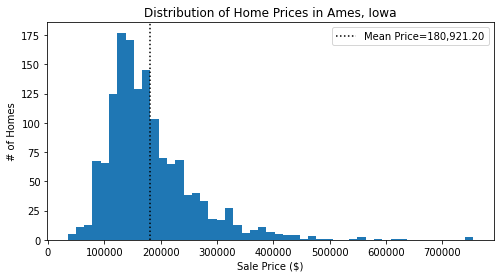

In [8]:
#Plot 1: Sale Price Distribution - OOP
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['SalePrice'],bins='auto');
ax.set_xlabel("Sale Price ($)")
ax.set_ylabel("# of Homes")
ax.set_title('Distribution of Home Prices in Ames, Iowa');
ax.axvline(df['SalePrice'].mean(),color='k', ls=':',
            label=f"Mean Price={df['SalePrice'].mean():,.2f}");
ax.legend()

> Note: if you don't need to customize fonts, you can **combine all `ax.set_xxxx(` commands (`ax.set_title`,`ax.set_xlabel`, etc) into 1 `ax.set()`

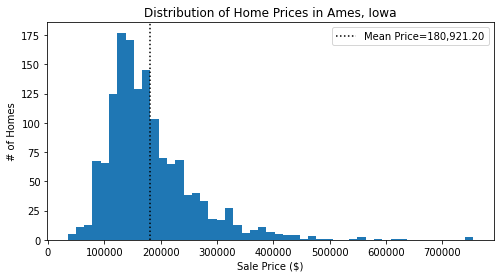

In [9]:
#Plot 1: Sale Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['SalePrice'],bins='auto');
ax.set(xlabel="Sale Price ($)", ylabel="# of Homes", 
       title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
ax.axvline(mean_price,color='k', ls=':', label=f"Mean Price={mean_price:,.2f}");
ax.legend();

## Method 03: Plot with Pandas

- Pandas's dataframes and series have a `.plot()` method
    - [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
    - The `kind` argument lets us specify if we want: 
        - "scatter"
        - "hist"
        - "bar"
        - "barh"
        - etc.
    - There are also some additional plotting methods:
        - e.g.: `df.hist()`

<AxesSubplot:ylabel='Frequency'>

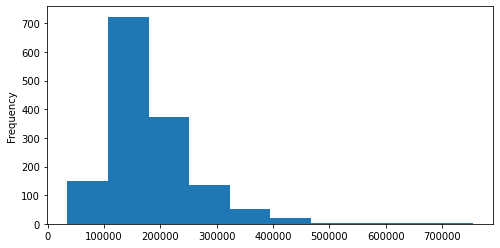

In [10]:
#Plot 1: Sale Price Distribution - pandas .plot kind=hist
df['SalePrice'].plot(kind='hist',figsize=(8,4))#,bins='auto')

>- Unfortunately .plot isn't perfect, which is why we also have `df.hist`

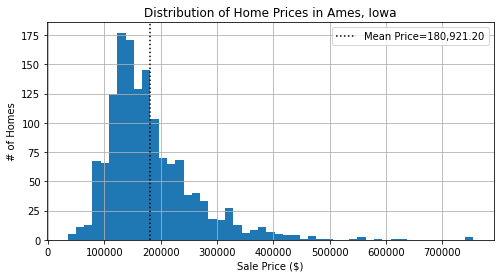

In [11]:
#Plot 1: Sale Price Distribution - pandas .hist
ax = df['SalePrice'].hist(figsize=(8,4),bins='auto')

ax.set(xlabel="Sale Price ($)", ylabel="# of Homes", 
       title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price={mean_price:,.2f}");
ax.legend();

## Method 04: Seaborn

- Seaborn has 2 different kinds of plotting functions. Basic ones that return an ordinary matplotlib axis and fancy/advanced ones that return an object called a "FacetGrid"


- Basic Functions (return an `ax`)
    ```python
    sns.histplot
    sns.regplot
    sns.scatter
    ```
- Advanced Functions (return a `FacetGrid`)
    ```python
    sns.lmplot
    sns.catplot
    sns.jointplot
    ```
    
- We will make our histogram 2 different ways with Seaborn. 
    - The simpler `sns.histplot` function.
    - The complex `sns.displot` function

### Seaborn - Simple Plot (returns an ax)

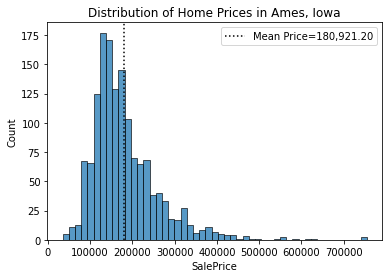

In [12]:
## PLot 1 - seaborn histplot
ax = sns.histplot(data=df,x='SalePrice')
ax.set(title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price={mean_price:,.2f}");
ax.legend();

### Seaborn - Advanced Plot (returns a FacetGrid)

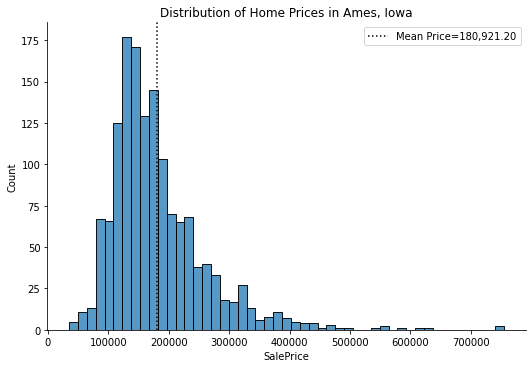

In [13]:
## PLot 1 - seaborn displot
g = sns.displot(data=df,x='SalePrice',aspect=1.5)
g.ax.set(title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
g.ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price={mean_price:,.2f}");
g.ax.legend();

# 🕹Activity: Answering Stakeholder Questions with EDA

## The Questions to Answer

1. What is the distribution of house prices in Ames, Iowa?
    - What is the median home price?
    - What is the average home price?
    

2. What is the relationship between square footage of the living area (`GrLivArea`)  and sale price (`SalePrice`)?
    
2. What is the average sale price for each of the different types of homes (BldgType)?

## Q1: What is the distribution of house prices in Ames, Iowa? 

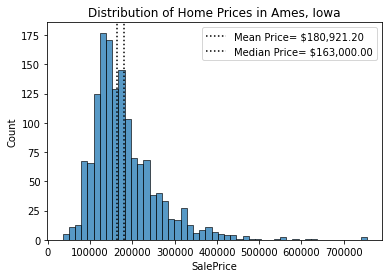

In [14]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots()
sns.histplot(data=df,x='SalePrice',ax=ax)
ax.set(title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
ax.axvline(mean_price,color='k', ls=':', 
           label=f"Mean Price= ${mean_price:,.2f}");

med_price = round(df['SalePrice'].median(),2)
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Price= ${med_price:,.2f}");
ax.legend();

### Customizing Xtick Label Formatting
- https://matplotlib.org/stable/gallery/pyplots/dollar_ticks.html?highlight=tick
- Let's make our price ticks look more professional
    - Add $'s 
    - Add , separator for thousands
    - Show 2 decimal places

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


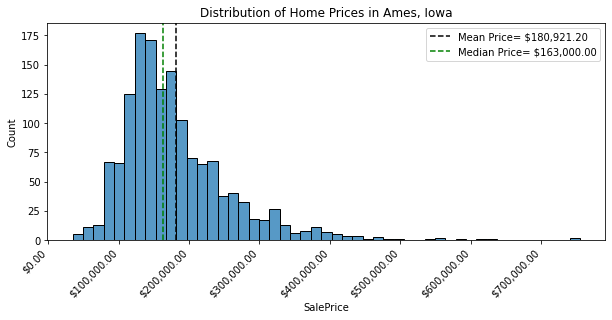

In [15]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(data=df,x='SalePrice',ax=ax,bins='auto')
ax.set(title='Distribution of Home Prices in Ames, Iowa');

mean_price = round(df['SalePrice'].mean(),2)
ax.axvline(mean_price,color='k', ls='--', 
           label=f"Mean Price= ${mean_price:,.2f}");

med_price = round(df['SalePrice'].median(),2)
ax.axvline(med_price,color='green', ls='--', 
           label=f"Median Price= ${med_price:,.2f}");
ax.legend();



price_fmt = mpl.ticker.StrMethodFormatter('${x:,.2f}')

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.xaxis.set_major_formatter(price_fmt)


### A1

-   

## Q2: What is the relationship between square footage of the living area (GrLivArea) and sale price (SalePrice)?

- Figure Requirements:
    - Markers are small enough to see distinct dots
    - Price-Formatted y axis
    - Regression line added 
    - Make sure the regression line is easily distinguishable vs the markers

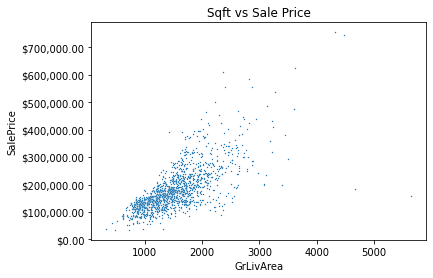

In [16]:
## Plot 2 with seaborn - scatterplot
ax = sns.scatterplot(data=df,x='GrLivArea', y='SalePrice',s=2)
ax.set_title('Sqft vs Sale Price');
ax.yaxis.set_major_formatter(price_fmt)

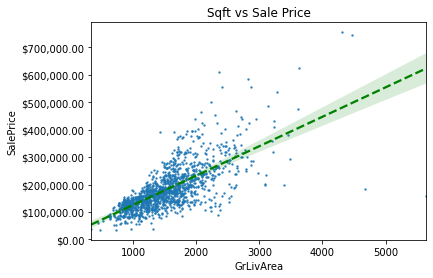

In [17]:
## Plot 2 with seaborn + regression line
ax = sns.regplot(data=df,x='GrLivArea', y='SalePrice',
                 scatter_kws={'s':2},line_kws={'color':'green',
                                              'ls':'--'})
ax.set_title('Sqft vs Sale Price');
ax.yaxis.set_major_formatter(price_fmt)

### A2

-   

## Q3: What is the average sale price for each of the different types of homes (BldgType)?

- Figure Requirements:
    - Bars are sorted in order from largest to smallest mean.
    - Bars have error bars added
    - Price-Formatted y axis

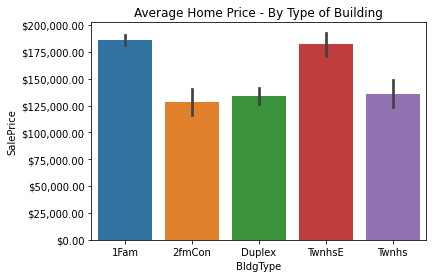

In [18]:
# Use sns.barplot to plot blgdtype vs saleprice (dont worry about order of bars yet)
ax = sns.barplot(data=df,x='BldgType',y="SalePrice");
ax.yaxis.set_major_formatter(price_fmt)
ax.set(title='Average Home Price - By Type of Building');

#### Plot 3: Average Sale Price by BldgType

In [19]:
# Use sns.barplot to plot blgdtype vs saleprice - ordered correctly

## First, calculate the correct order for the bars
bld_order = df.groupby('BldgType').mean()['SalePrice'].sort_values(ascending=False).index
bld_order

Index(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype='object', name='BldgType')

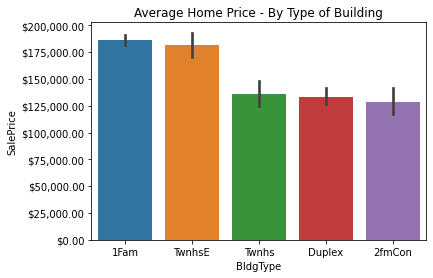

In [20]:
## Now use the info from abvoe to order the bars
ax = sns.barplot(data=df,x='BldgType',y="SalePrice",order=bld_order);
ax.yaxis.set_major_formatter(price_fmt)
ax.set(title='Average Home Price - By Type of Building');

### A3

-   

### EDA Wrap Up

- We did it! We used our awesome visualization techniques to provide visual answers to real questions. 
- We chose the ideal figures to best answer the questions.

# BRANCH/DECISION POINT:

- IF we are low on time, which would we rather cover?
    - A) Multiple subplots
    - B) Customizing aesthetics

## More Advanced Plots - Subplots

- Combine our plots for Q2 and Q3 into 1

Text(0.5, 1.05, 'Relationship between Sale Price and House Features')

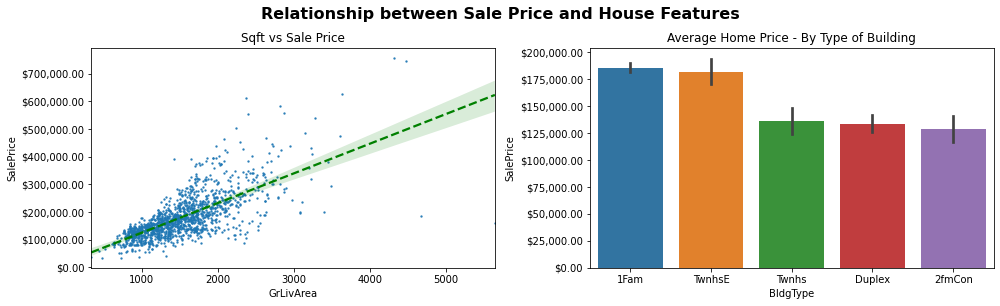

In [21]:
# Combined subplots
fig, axes = plt.subplots(ncols=2,figsize=(14,4))


### Plot 0
sns.regplot(data=df,x='GrLivArea', y='SalePrice',ax=axes[0],
                 scatter_kws={'s':2},line_kws={'color':'green',
                                              'ls':'--'})
axes[0].set_title('Sqft vs Sale Price');
axes[0].yaxis.set_major_formatter(price_fmt)

### Plot 1
sns.barplot(data=df,x='BldgType',y="SalePrice",order=bld_order,ax=axes[1]);
axes[1].yaxis.set_major_formatter(price_fmt)
axes[1].set(title='Average Home Price - By Type of Building'); 

## Fix overlap
fig.tight_layout()

## Add suptitle
fig.suptitle('Relationship between Sale Price and House Features',y=1.05,
             fontsize=16,fontweight='bold')

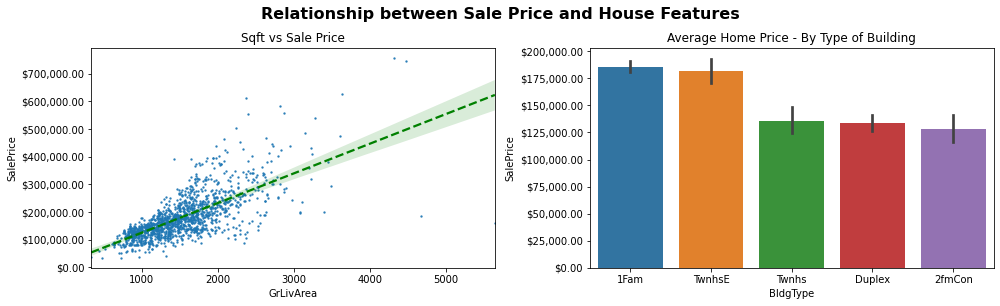

In [22]:
## past the full thing into thsi cell and make a function
## make it takes the df and lets move the suptitle to the function definiton
def final_eda_figure(df,suptitle='Relationship between Sale Price and House Features'):
    # Combined subplots
    fig, axes = plt.subplots(ncols=2,figsize=(14,4))


    ### Plot 0
    sns.regplot(data=df,x='GrLivArea', y='SalePrice',ax=axes[0],
                     scatter_kws={'s':2},line_kws={'color':'green',
                                                  'ls':'--'})
    axes[0].set_title('Sqft vs Sale Price');
    axes[0].yaxis.set_major_formatter(price_fmt)

    ### Plot 1
    sns.barplot(data=df,x='BldgType',y="SalePrice",order=bld_order,ax=axes[1]);
    axes[1].yaxis.set_major_formatter(price_fmt)
    axes[1].set(title='Average Home Price - By Type of Building'); 

    ## Fix overlap
    fig.tight_layout()

    ## Add suptitle
    fig.suptitle(suptitle,y=1.05,
                 fontsize=16,fontweight='bold')
    return fig,ax


fig, ax = final_eda_figure(df)
fig.savefig('our-final-figure.png')

# Customizing Figure Aesthetics

## Quick & Easy Visual Overhaul

### Matplotlib Styles
- https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [23]:
## List of available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

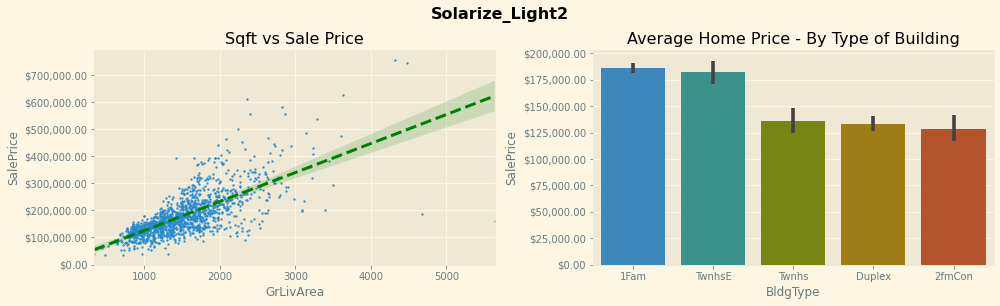

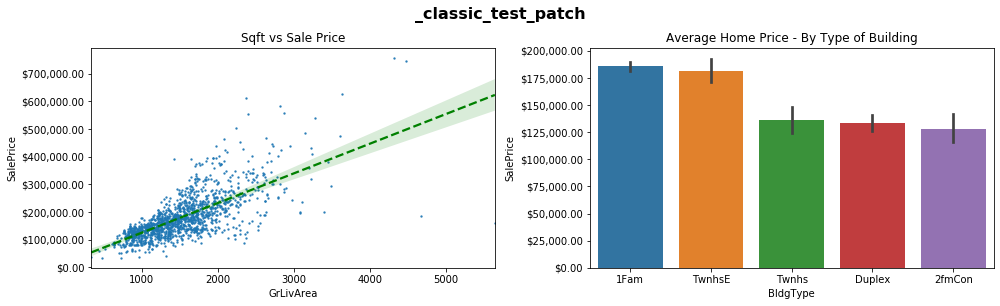

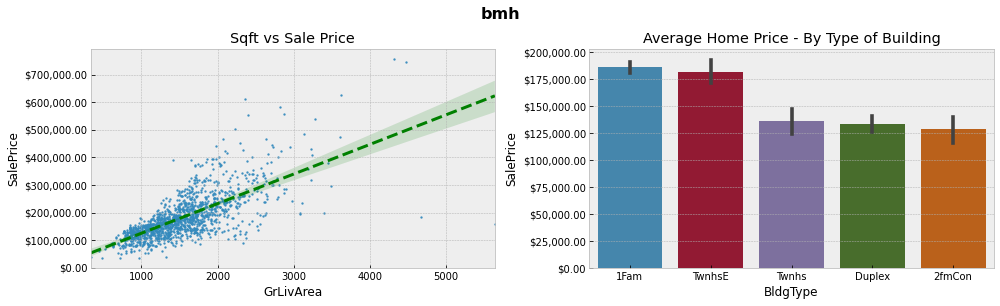

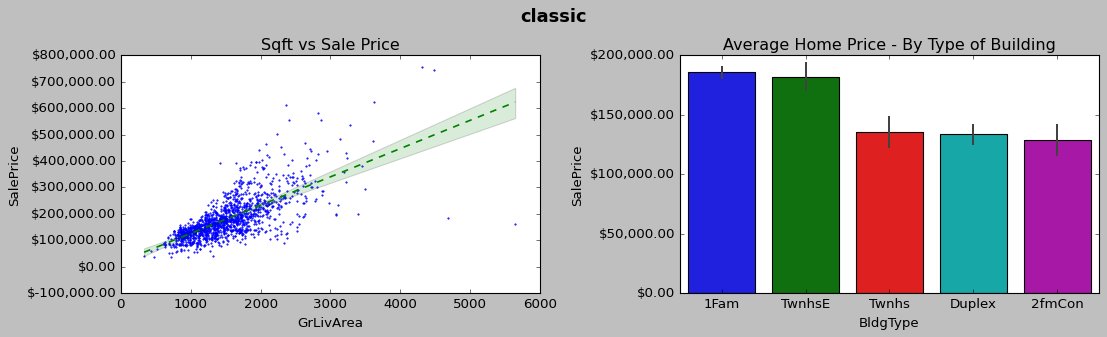

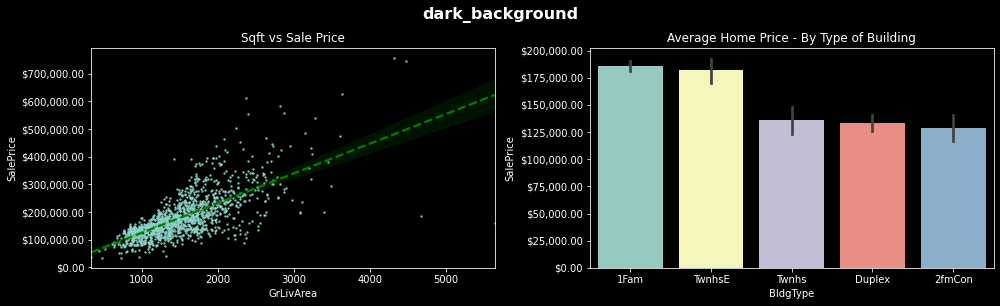

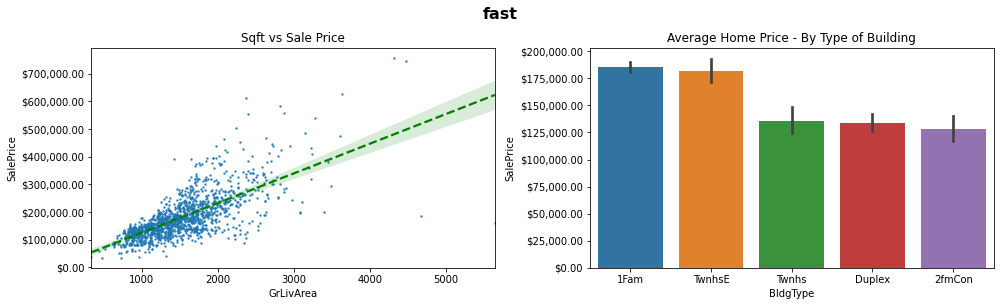

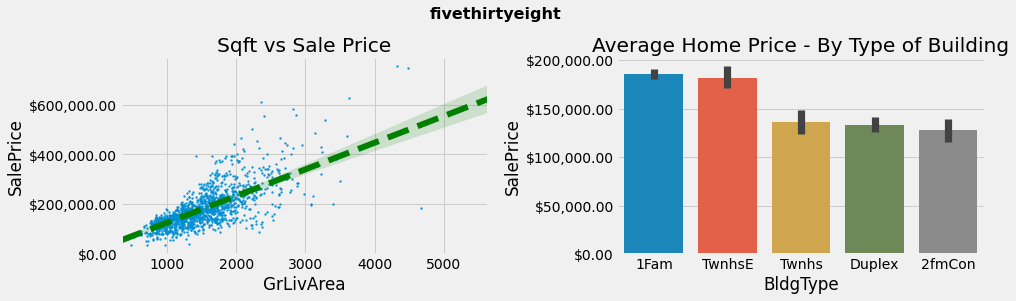

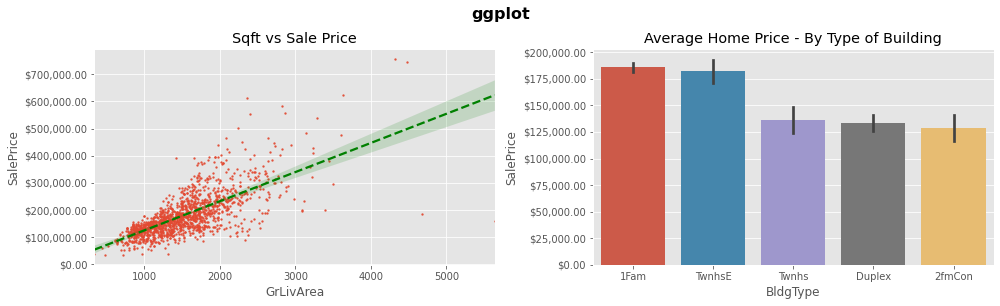

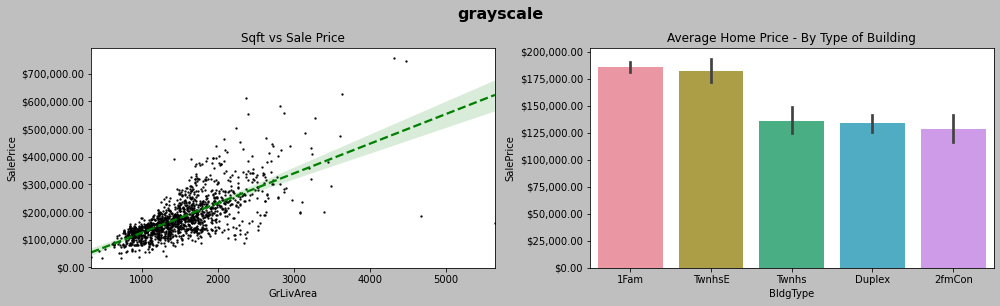

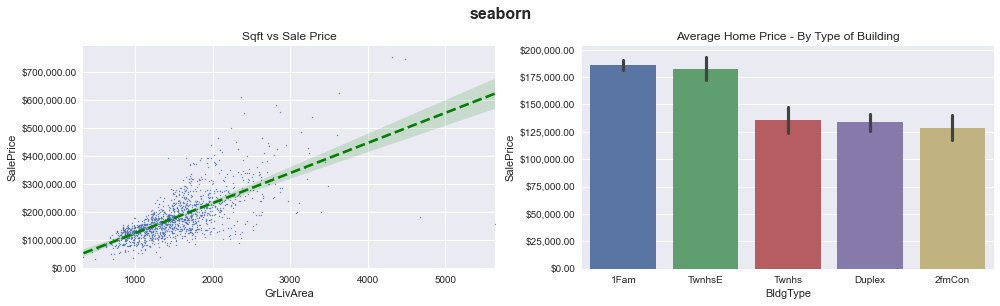

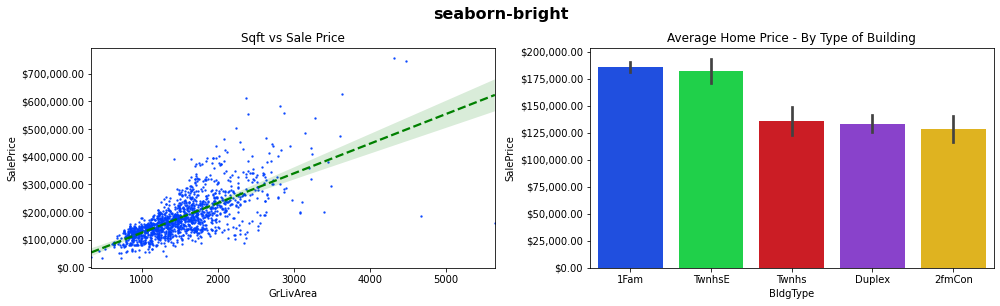

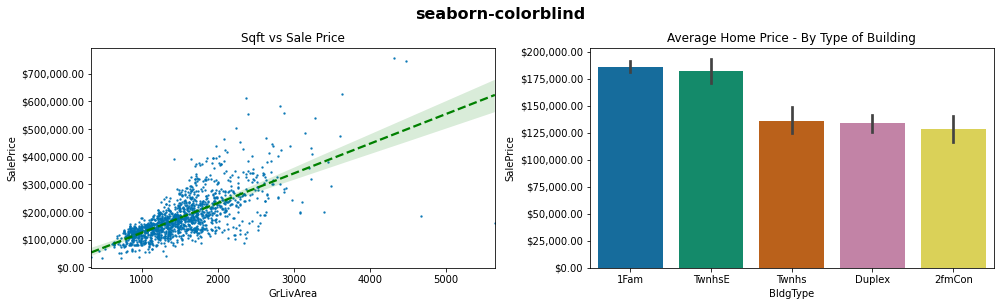

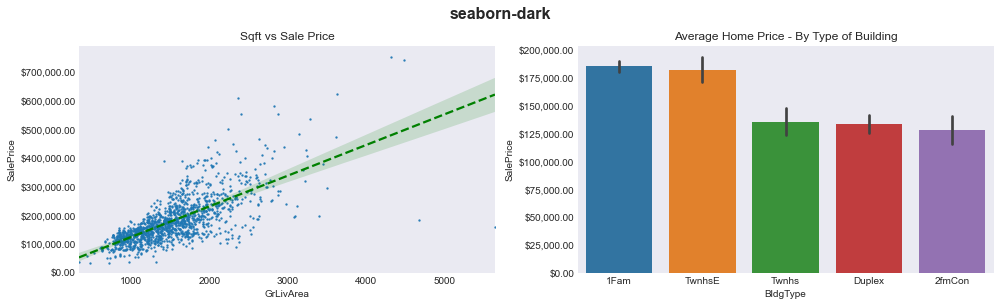

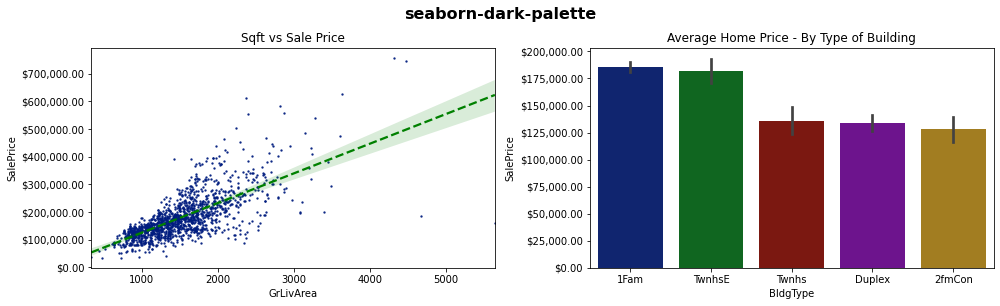

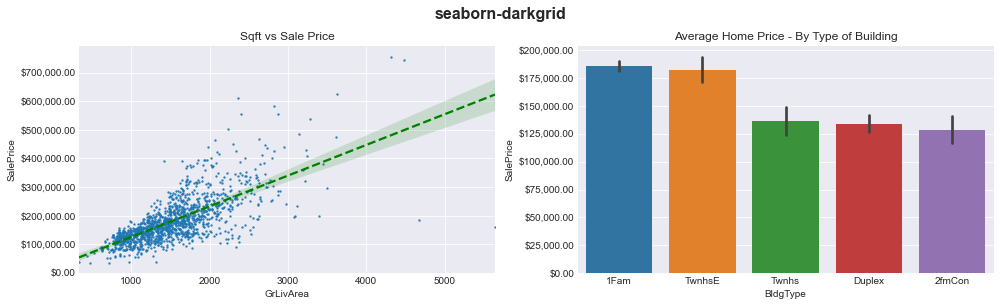

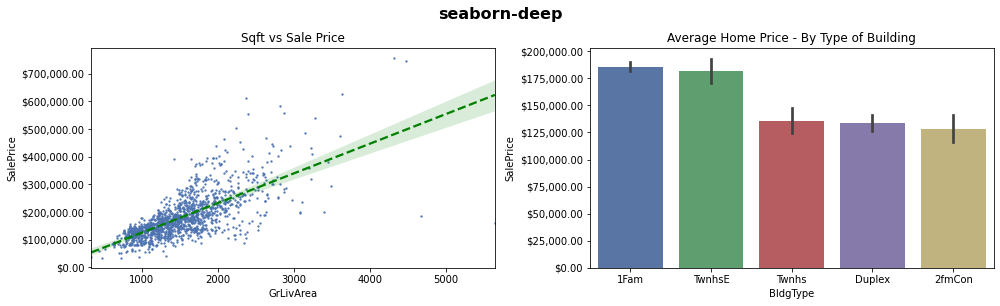

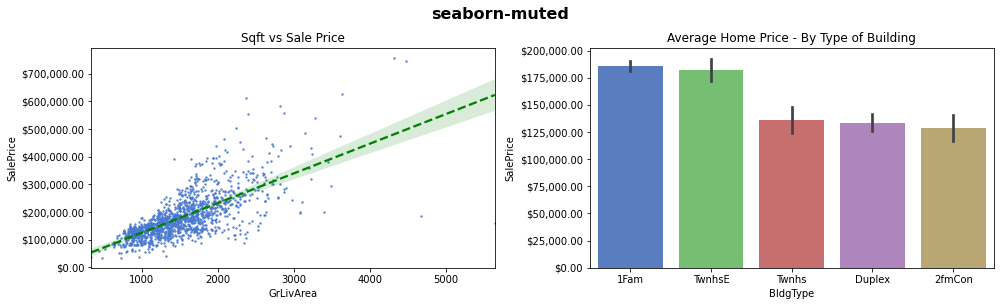

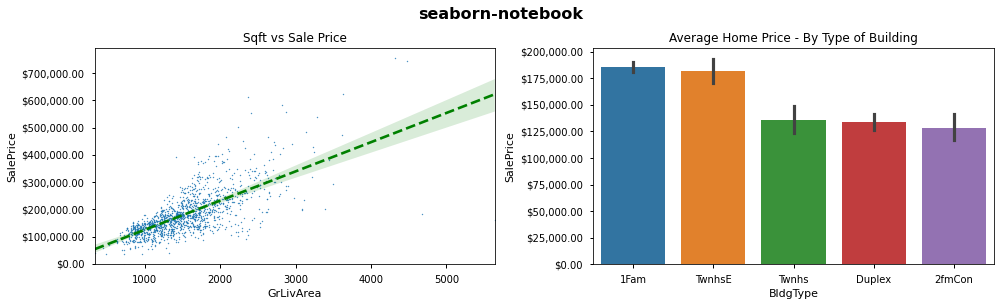

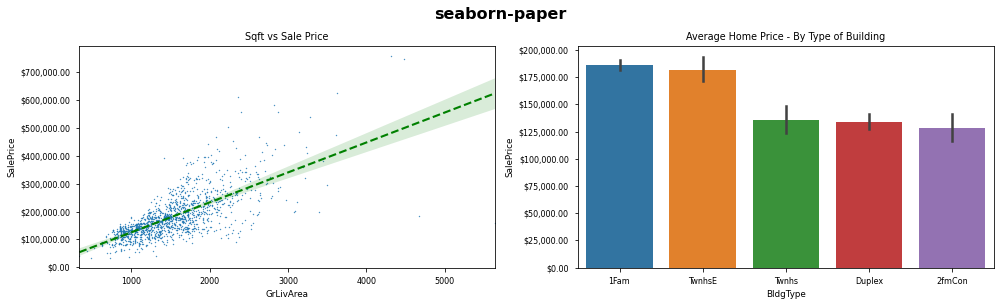

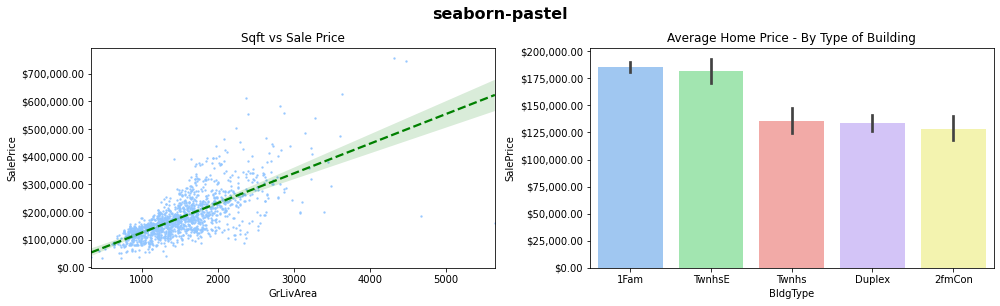

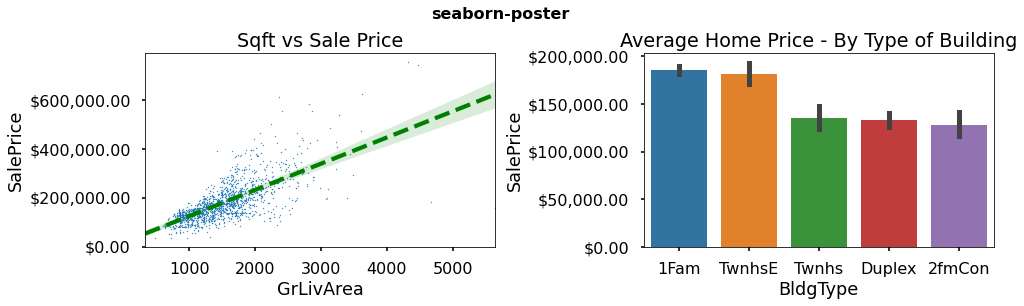

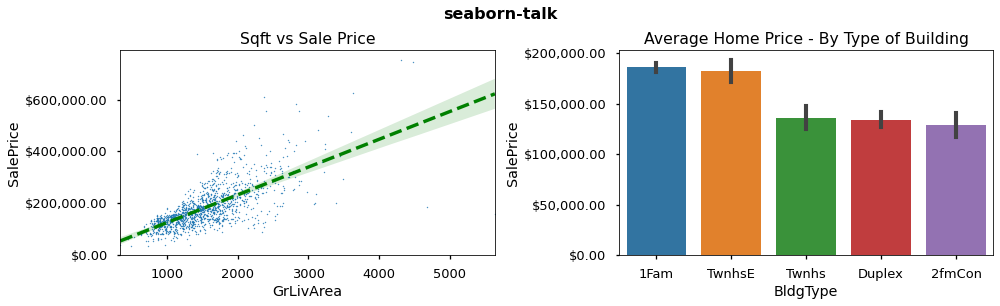

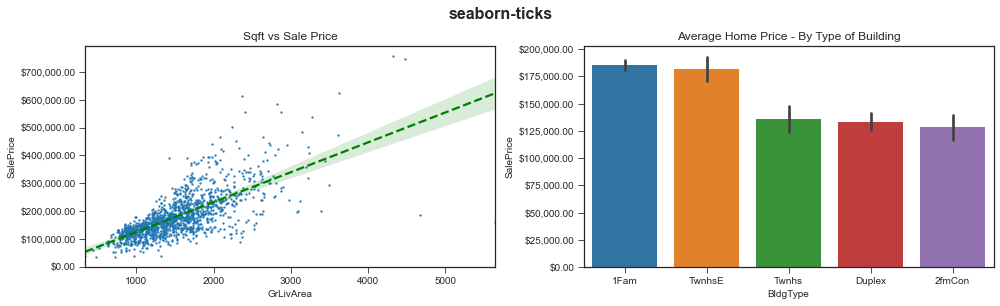

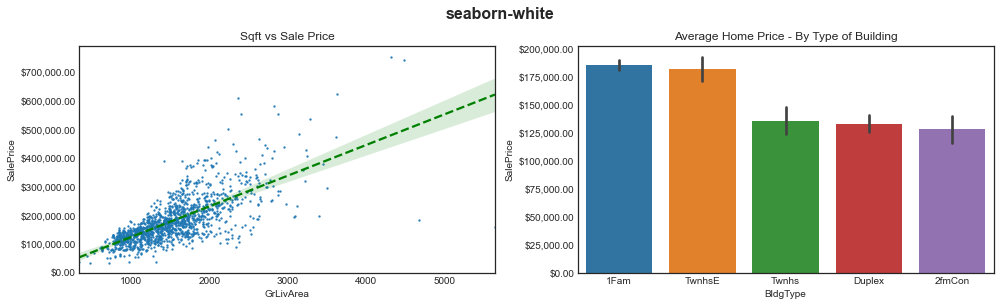

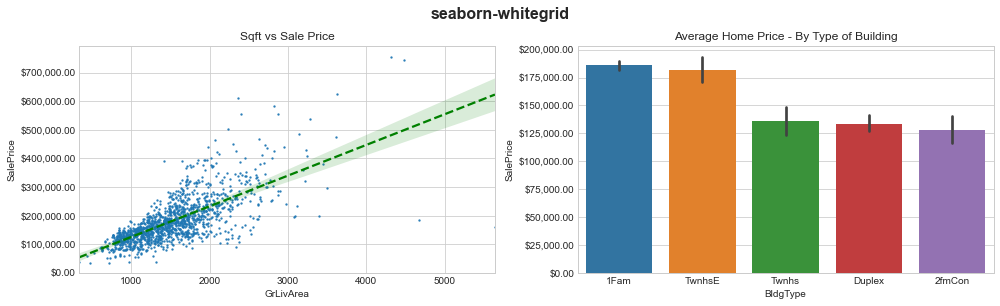

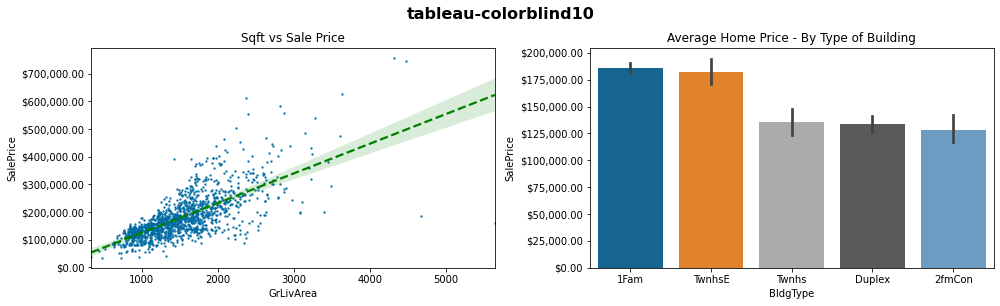

In [24]:
for style in plt.style.available:
    
    ## Use with plt.style.context to TEMPORARILY change the style
    with plt.style.context(style):
        fig, ax = final_eda_figure(df,suptitle=style)
        plt.show()


>- Once you've found a style and want to apply it to the entire notebook, add the following command at the top of your notebook right after importing matplotlib
```python 
plt.style.use('seaborn-talk')
```

### Seaborn Themes/Contexts/Colorpalette

- https://seaborn.pydata.org/api.html#themeing
- https://seaborn.pydata.org/tutorial/color_palettes.html

In [25]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

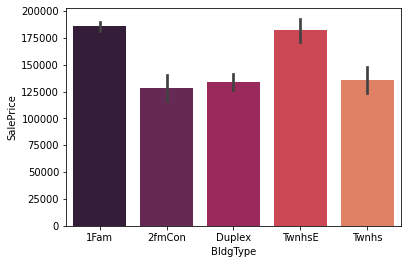

In [26]:
palette = sns.color_palette('rocket')
sns.barplot(data=df,x='BldgType',y='SalePrice',palette=palette)

(<Figure size 1008x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Average Home Price - By Type of Building'}, xlabel='BldgType', ylabel='SalePrice'>)

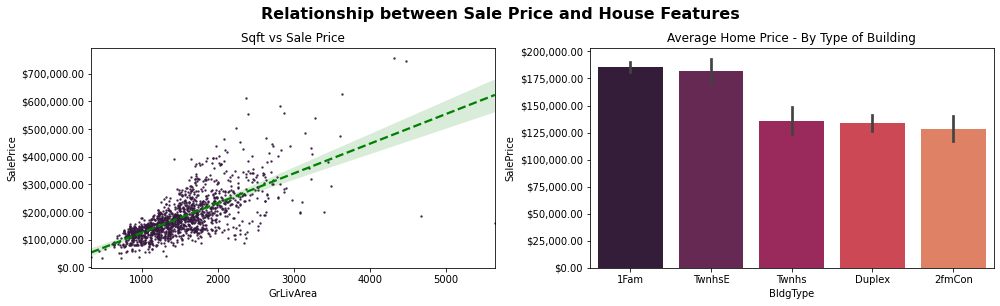

In [27]:
sns.set_palette('rocket')
final_eda_figure(df)

# All Resources:


### **Matplotlib Documentation**
- [Markers](https://matplotlib.org/3.1.1/api/markers_api.html)
- [Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html )
- [Text](https://matplotlib.org/3.1.0/tutorials/text/text_intro.html )
- [Text Properties](https://matplotlib.org/3.1.1/tutorials/text/text_props.html)

- [Tick Formatters](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html)


### Cheat Sheets

- [Matplotlib and Seaborn Pages in our Master Cheat sheets pdf](https://drive.google.com/open?id=1PxRAhlaK7ucf0S2F732eJ94ovaPtUSE_)

- **Bookmark this article, its the best explanation of how matploblib'S 2 interfaces work:**
> ["Artist" in Matplotlib - something I wanted to know before spending tremendous hours on googling how-tos.](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo)<br>

# APPENDIX

## Alternative Plots For Each Q

### Q2 Alternatives

#### Plot 2: Sqft Living Area vs Sale Price - plt functions

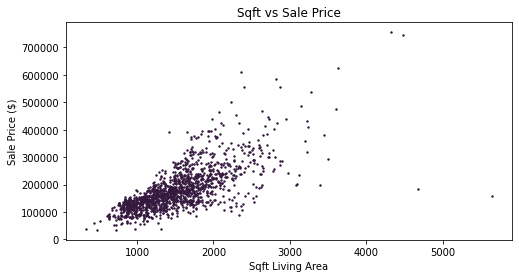

In [28]:
# Plot 2: sqft vs sale price
plt.figure(figsize=(8,4))
plt.scatter(df['GrLivArea'], df['SalePrice'],s=2)
plt.ylabel('Sale Price ($)')
plt.xlabel('Sqft Living Area')
plt.title('Sqft vs Sale Price');

#### Plot 2: Sqft Living Area vs Sale Price - oop

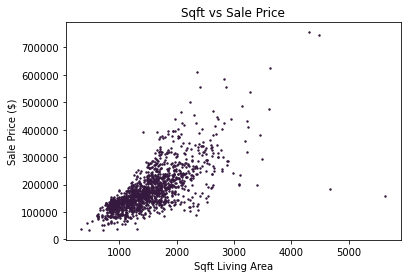

In [29]:
## Plot 2 with OOP
fig,ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'],s=2)
ax.set_ylabel('Sale Price ($)')
ax.set_xlabel('Sqft Living Area')
ax.set_title('Sqft vs Sale Price');

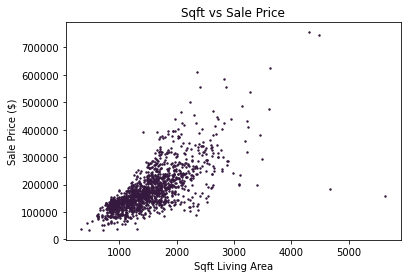

In [30]:
# Plot 2 with OOP and .set()
fig,ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'],s=2)
ax.set(ylabel='Sale Price ($)', xlabel='Sqft Living Area', title='Sqft vs Sale Price');

#### Plot 2: Sqft Living Area vs Sale Price

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


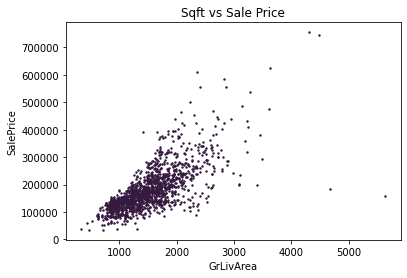

In [31]:
## Plot 2 with pandas
df.plot(kind='scatter',x='GrLivArea', y='SalePrice',s=2,title='Sqft vs Sale Price');

## Q3 Alternatives

#### Plot 3: Average Sale Price by BldgType

In [32]:
# Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').mean()['SalePrice']
bldgtype_means

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

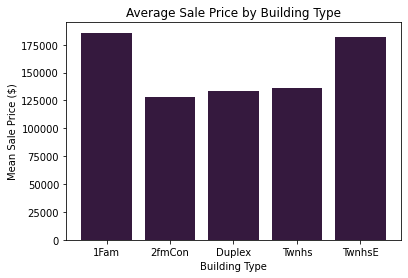

In [33]:
# Plot 3: avg sale price by blgtype
plt.bar(bldgtype_means.index, bldgtype_means.values)
plt.ylabel('Mean Sale Price ($)')
plt.xlabel('Building Type')
plt.title('Average Sale Price by Building Type');

#### Plot 3+Level Up: Average Sale Price by BldgType - with Error Bars

In [34]:
# Level Up - Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').agg(['mean','std','count'])['SalePrice']
bldgtype_means['Std Error'] = bldgtype_means['std']/ np.sqrt(bldgtype_means['count'])
bldgtype_means

,mean,std,count,Std Error
BldgType,,,,
1Fam,185763.807377,82648.502922,1220,2366.219755
2fmCon,128432.258065,35458.545158,31,6368.542713
Duplex,133541.076923,27833.249197,52,3859.777198
Twnhs,135911.627907,41013.222080,43,6254.457732
TwnhsE,181959.342105,60626.108918,114,5678.155342


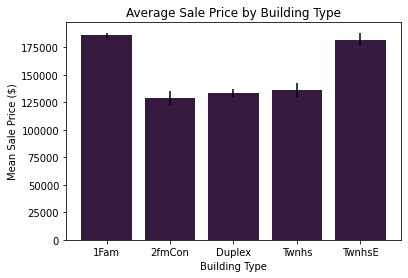

In [35]:
# Plot 3-LevelUp: avg sale price by blgtype
plt.bar(bldgtype_means.index, bldgtype_means['mean'],yerr = bldgtype_means['Std Error'])
plt.ylabel('Mean Sale Price ($)')
plt.xlabel('Building Type')
plt.title('Average Sale Price by Building Type');

### Method 02: Using Matplotlib OOP Interface

In [36]:
# Prepare Data - Plot 3: avg sale price by blgtype
bldgtype_means = df.groupby('BldgType').mean()['SalePrice']
bldgtype_means

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

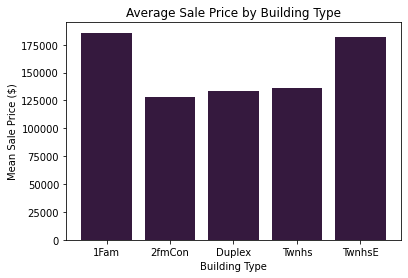

In [37]:
# Plot 3: avg sale price by blgtype
fig,ax = plt.subplots()
ax.bar(bldgtype_means.index, bldgtype_means.values)
ax.set(ylabel='Mean Sale Price ($)', xlabel='Building Type', 
       title='Average Sale Price by Building Type');

### Method 03: Pandas

#### Plot 3: Average Sale Price by BldgType

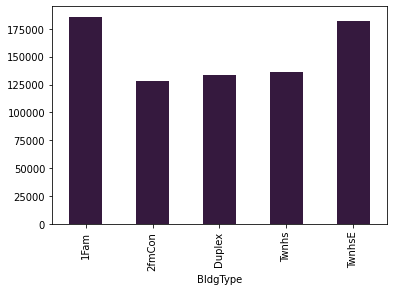

In [38]:
df.groupby('BldgType').mean()['SalePrice'].plot(kind='bar');